<a href="https://colab.research.google.com/github/harsh51380/harsh51380/blob/main/minor_project_ediglobe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving advertising.csv to advertising (1).csv


In [ ]:
df = pd.read_csv("advertising.csv")
print(df.head())
print(df.info())


   Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04 01:39:02  

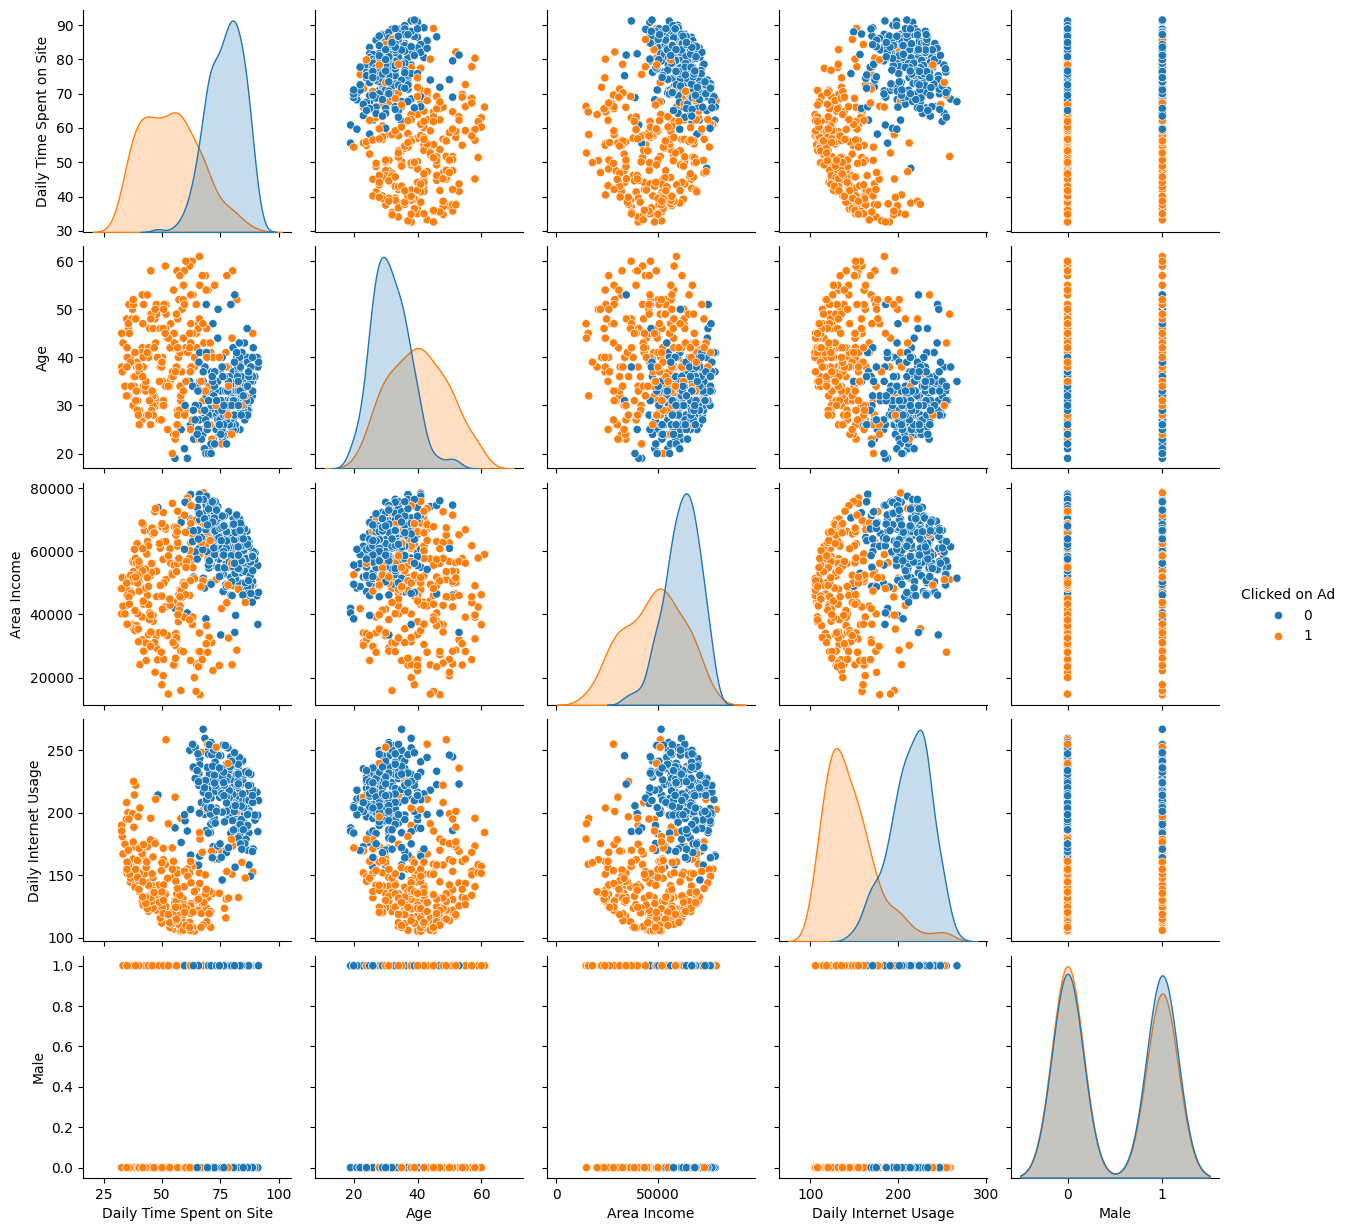

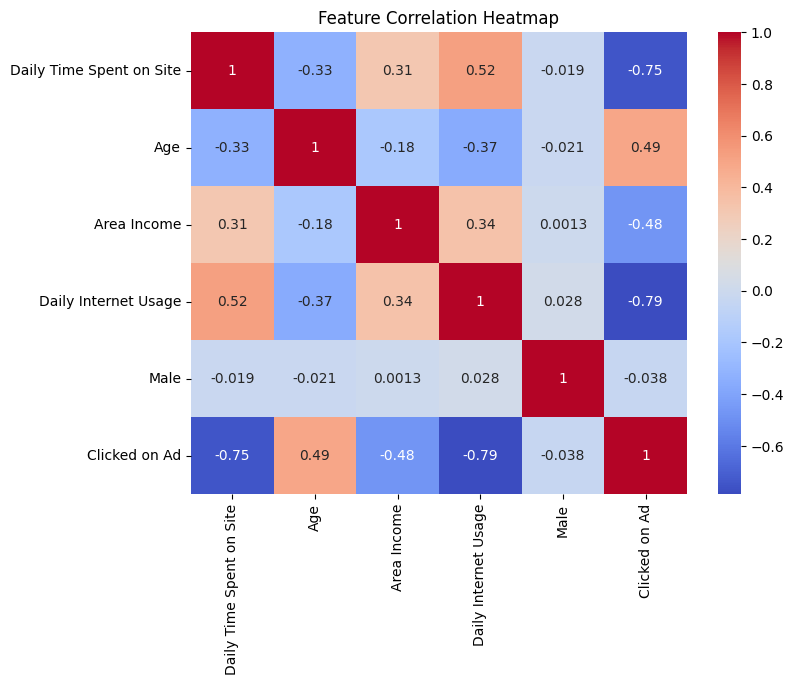

In [ ]:
sns.pairplot(df.sample(500), hue="Clicked on Ad")
plt.show()
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
if 'Male' in df.columns and df['Male'].dtype == 'bool':
    df['Male'] = df['Male'].map({True:1, False:0})

X = df[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Male']]
y = df['Clicked on Ad']


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [ ]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred) * 100)
print("Precision:", precision_score(y_test, y_pred)* 100)
print("Recall:", recall_score(y_test, y_pred)*100)
print("F1 Score:", f1_score(y_test, y_pred)*100)
print("ROC AUC:", roc_auc_score(y_test, y_prob)*100)

Accuracy: 97.0
Precision: 98.01324503311258
Recall: 96.1038961038961
F1 Score: 97.04918032786885
ROC AUC: 98.58566091442805


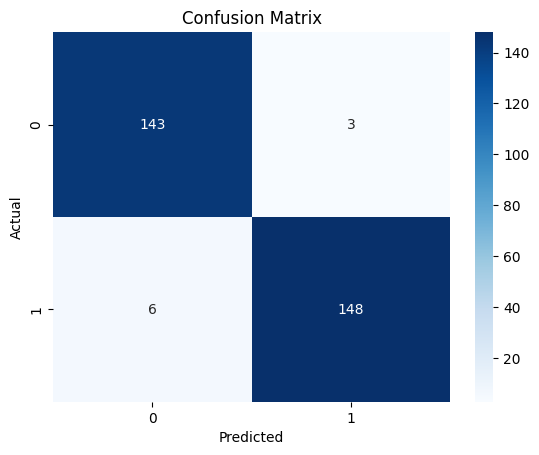

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

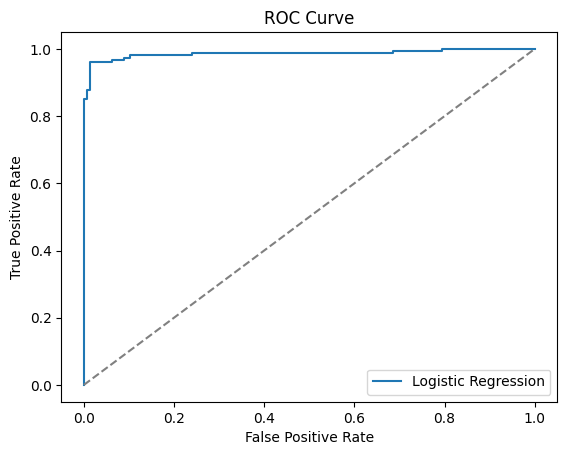

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0,1],[0,1],'--', color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [ ]:
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
print("Cross-validation Accuracy:", cv_scores.mean() * 100)

Cross-validation Accuracy: 97.09999999999998


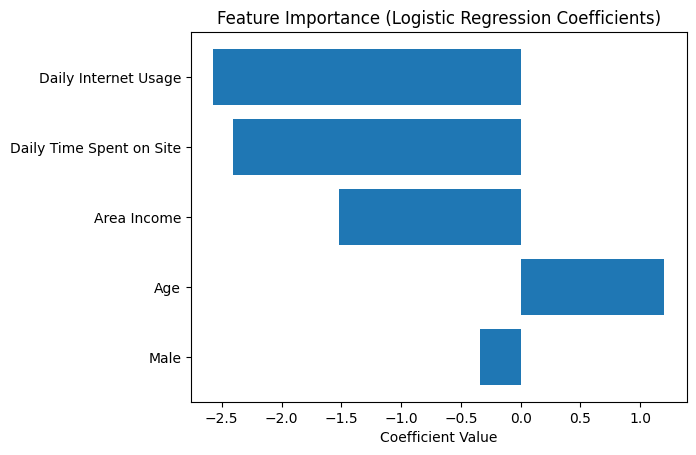

In [ ]:
importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', key=abs)

plt.barh(importance['Feature'], importance['Coefficient'])
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.show()